In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [96]:
df = pd.read_csv('wipro.csv')

df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,26-Apr-2019,295.20,296.40,296.65,293.50,294.40,294.80,295.21,6196551,1.829265e+09,120833,3369963,54.38
1,WIPRO,EQ,30-Apr-2019,294.80,295.00,299.45,295.00,298.55,298.55,297.52,7339917,2.183791e+09,74491,4068415,55.43
2,WIPRO,EQ,02-May-2019,298.55,298.55,298.85,292.65,293.85,293.65,294.97,4539125,1.338884e+09,48820,2520963,55.54
3,WIPRO,EQ,03-May-2019,293.65,293.50,293.70,288.55,291.65,290.90,290.38,7408308,2.151239e+09,158714,4380862,59.13
4,WIPRO,EQ,06-May-2019,290.90,289.90,293.80,289.20,290.90,290.85,291.50,4304345,1.254732e+09,67172,1711610,39.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,WIPRO,EQ,20-Apr-2020,187.00,189.00,189.00,180.15,180.55,181.10,183.33,8101663,1.485310e+09,79381,3735374,46.11
240,WIPRO,EQ,21-Apr-2020,181.10,179.00,179.90,173.80,178.30,178.05,176.98,9043319,1.600480e+09,75722,3454927,38.20
241,WIPRO,EQ,22-Apr-2020,178.05,177.00,179.50,175.05,178.30,178.55,177.59,5311640,9.432809e+08,62150,2169513,40.84
242,WIPRO,EQ,23-Apr-2020,178.55,179.40,182.60,177.10,181.00,180.90,180.23,5555420,1.001237e+09,54314,2444423,44.00


In [0]:
df.head
df.reset_index(drop=True, inplace=True)

In [98]:
df.shape

(244, 15)

In [99]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,26-Apr-2019,295.20,296.40,296.65,293.50,294.40,294.80,295.21,6196551,1.829265e+09,120833,3369963,54.38
1,WIPRO,EQ,30-Apr-2019,294.80,295.00,299.45,295.00,298.55,298.55,297.52,7339917,2.183791e+09,74491,4068415,55.43
2,WIPRO,EQ,02-May-2019,298.55,298.55,298.85,292.65,293.85,293.65,294.97,4539125,1.338884e+09,48820,2520963,55.54
3,WIPRO,EQ,03-May-2019,293.65,293.50,293.70,288.55,291.65,290.90,290.38,7408308,2.151239e+09,158714,4380862,59.13
4,WIPRO,EQ,06-May-2019,290.90,289.90,293.80,289.20,290.90,290.85,291.50,4304345,1.254732e+09,67172,1711610,39.76


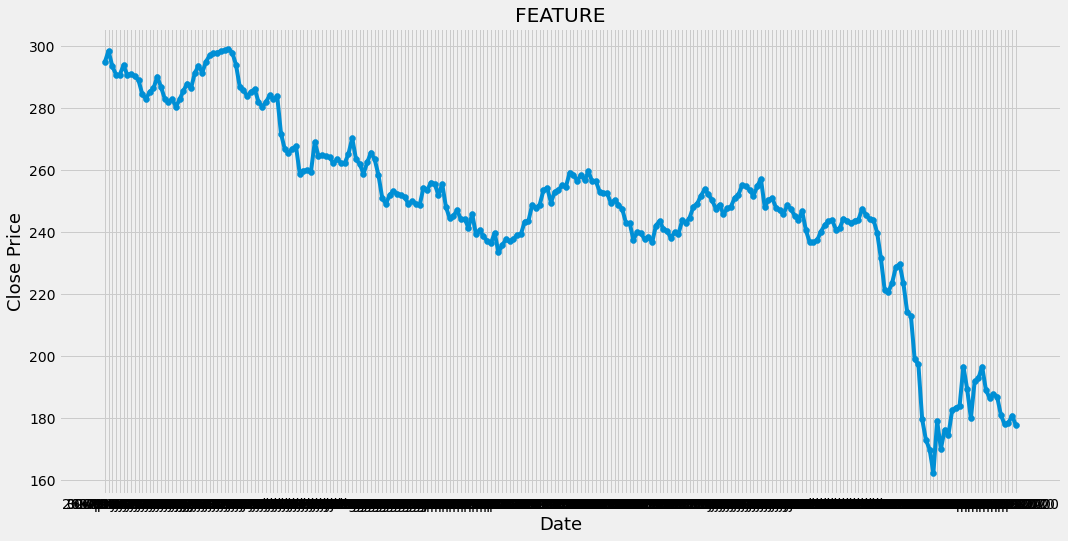

In [100]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('FEATURE')
plt.scatter(df['Date'], df['Close Price'])
plt.plot(df['Date'], df['Close Price'])

plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close Price'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [102]:
training_data_len

196

In [0]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [104]:
len(scaled_data)

244

In [105]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
len(train_data)

196

In [0]:
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(15, len(train_data)):
    x_train.append(train_data[i-15:i,0])
    y_train.append(train_data[i,0])

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [111]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
181/181 [==============================] - 3s 15ms/step - loss: 0.0172


In [112]:
#Test data set
test_data = scaled_data[training_data_len - 15: , : ]
len(test_data)

63

In [0]:
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(15,len(test_data)):
    x_test.append(test_data[i-15:i,0])

In [0]:
#x_test

In [0]:
#y_test

In [116]:
len(x_test)

48

In [117]:
len(y_test)

48

In [0]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [121]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

23.355729117427988

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


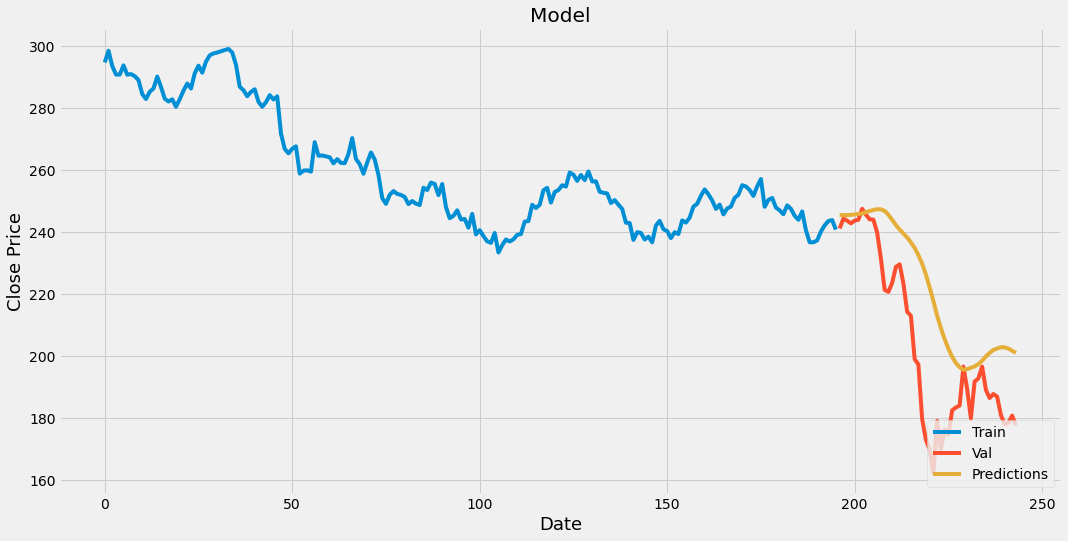

In [122]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()